# Preprocessing the data

In [1]:
# Readthe csv data and crate the dataframe
from pathlib import Path
import pandas as pd

path = Path("Resources/combined_data.csv")
df = pd.read_csv(path)
df.dropna(inplace=True)


In [2]:
# slice features and target
x = df.drop(columns=['Fraud Reporting Count', 'Quarter'])
y = df["Fraud Reporting Count"].values.reshape(-1, 1)

In [3]:
#Slicing data into train and test subsets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

In [4]:
from sklearn.preprocessing  import StandardScaler

#Scaling x data
x_scaler = StandardScaler().fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

#Scaling y data
y_scaler = StandardScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Decision Tree Model

#### Training

In [5]:
#Train the decisin tree model
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=3)
model = model.fit(x_train_scaled, y_train_scaled)

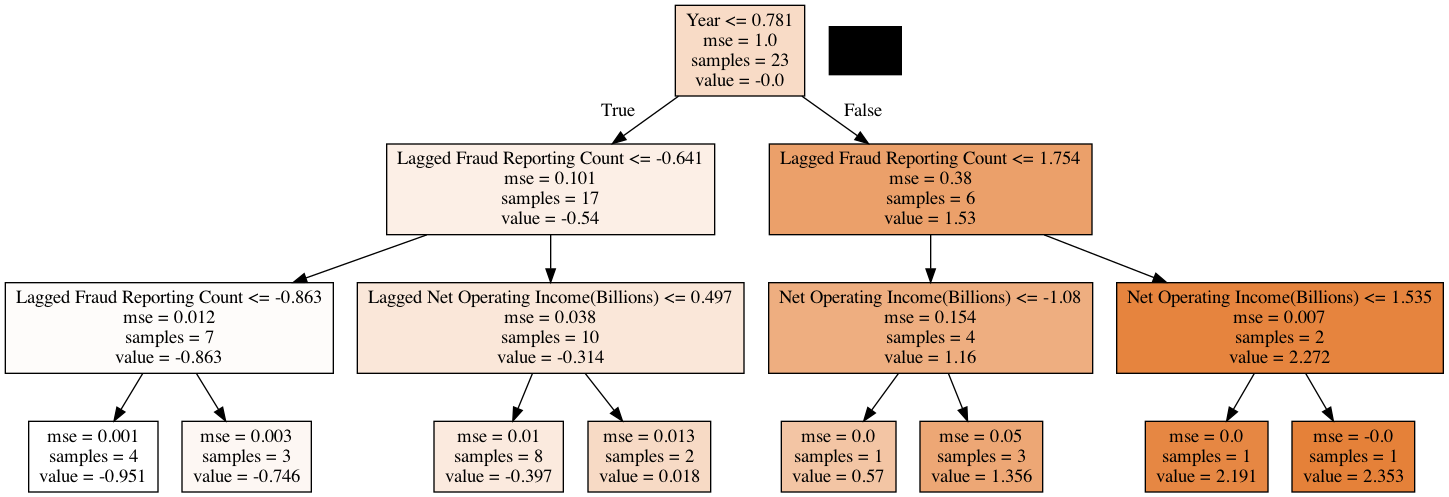

In [6]:
#Visualizing the Decision Tree Model
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=None, feature_names=x.columns, class_names=["0", "1"], filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [7]:
#Perform the prediciton
y_pred = model.predict(x_test_scaled)


#### Results

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

#Displaying Metrics
print(f'The Mean Squared Error is: {mean_squared_error(y_test, y_pred)}')
display(f'The R squared is: {r2_score(y_test, y_pred)}')


The Mean Squared Error is: 30158135105.111946


'The R squared is: -28.257742525361472'

In [ ]:

import numpy as np
y_pred_train = model.predict(x_train_scaled)
concatenated = np.concatenate((y_pred, y_pred_train))

y_predicted = y_scaler.inverse_transform(concatenated)

pd.DataFrame({
    "Actual":df["Fraud Reporting Count"],
    "Predicted":y_predicted
}).plot()

